In [1]:
import pandas as pd
import numpy as np

In [2]:
ev_cars_df = pd.read_csv("/content/drive/MyDrive/EV_cars_India_2023.csv")

In [3]:
ev_cars_df

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,NaN,NaN
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,50min,Automatic,NaN,NaN,NaN
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,350 L (Liters),Automatic,NaN
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN


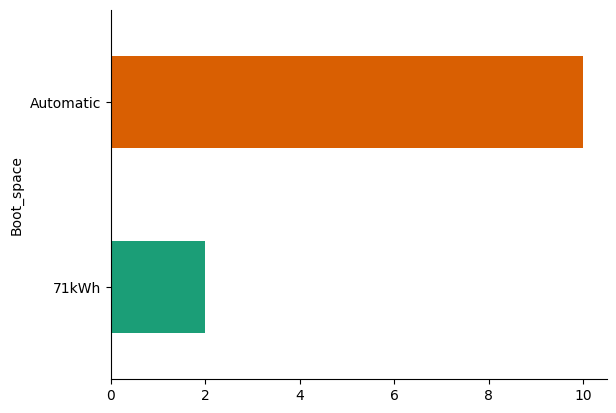

In [4]:
# @title Boot_space

from matplotlib import pyplot as plt
import seaborn as sns
ev_cars_df.groupby('Boot_space').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# @title Car_price

#from matplotlib import pyplot as plt
#ev_cars_df['Car_price'].plot(kind='hist', bins=20, title='Car_price')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# Function to convert 'cr' to 'lakh' and handle ranges
def convert_price(price):
    if isinstance(price, str):
        if 'cr' in price:
            return float(price.replace(' cr', '')) * 100
        if '-' in price:
            prices = price.replace(' lakh', '').split(' - ')
            return (float(prices[0]) + float(prices[1])) / 2
        return float(price.replace(' lakh', ''))
    return price

In [7]:
# Apply conversion function to 'Car_price' column
ev_cars_df['Car_price'] = ev_cars_df['Car_price'].apply(convert_price)

In [8]:
# Convert 'Batter_cap' to string and handle case variations and without spaces
ev_cars_df['Batter_cap'] = ev_cars_df['Batter_cap'].astype(str).str.lower().str.replace('kwh', '').str.replace(' ', '')



In [9]:
# Identify non-numeric values in 'Batter_cap' column
non_numeric_batter_cap = ev_cars_df[~ev_cars_df['Batter_cap'].str.isnumeric()]
print(non_numeric_batter_cap['Batter_cap'])

0        17.3
1        19.2
3        50.3
4       60.48
5        39.2
6        34.5
7        40.5
8        17.3
9        19.2
11       50.3
12      60.48
13       39.2
14       34.5
15       40.5
16       71.7
17       29.2
18       77.4
19    200kmph
20        nan
21       32.6
22       77.4
23    200kmph
24        nan
25       32.6
26      107.8
27       93.4
28        nan
29     83.9kw
Name: Batter_cap, dtype: object


In [10]:
# Convert 'Batter_cap' to numeric values, extracting the numeric part
ev_cars_df['Batter_cap'] = ev_cars_df['Batter_cap'].str.extract('(\d+\.?\d*)').astype(float)

In [11]:
# Extract numeric value from 'Drive_range' and convert to km
ev_cars_df['Drive_range'] = ev_cars_df['Drive_range'].str.extract('(\d+)').astype(float)

In [12]:
# Extract numeric value from 'Power' and convert to Bhp
ev_cars_df['Power'] = ev_cars_df['Power'].str.extract('(\d+\.?\d*)').astype(float)

In [13]:
# Investigate unique values in 'Charge_time'
unique_charge_times = ev_cars_df['Charge_time'].unique()
print("Unique 'Charge_time' values before cleaning:", unique_charge_times)

Unique 'Charge_time' values before cleaning: ['7 Hours' '58 Min(10-80%)' '7.5h' '8.5 to 9 Hours' '9.5-10 Hours'
 '6.16 Hours' 'Automatic' '15 Hours' '1.5H' '10.5 Hours' '18 Min (0-80%)'
 '7.25h(AC 0-100%)' '2.5 Hours' '200kmph']


In [14]:
def convert_charge_time(charge_time):
    if isinstance(charge_time, str):
        charge_time = charge_time.lower().replace(' hours', 'h').replace('h', '').replace('min(10-80%)', '0.58')
        parts = charge_time.split()
        total_hours = 0
        for part in parts:
            if 'min' in part:
                try:
                    total_hours += float(part.replace('min', '')) / 60
                except ValueError:
                    continue
            else:
                try:
                    total_hours += float(part)
                except ValueError:
                    continue
        return total_hours
    return charge_time

In [15]:
# Apply conversion function to 'Charge_time' column
ev_cars_df['Charge_time'] = ev_cars_df['Charge_time'].apply(convert_charge_time)

In [16]:
# Check unique values in 'Charge_time' after cleaning
unique_charge_times_cleaned = ev_cars_df['Charge_time'].unique()
print("Unique 'Charge_time' values after cleaning:", unique_charge_times_cleaned)

Unique 'Charge_time' values after cleaning: [ 7.   58.58  7.5  17.5   0.    6.16 15.    1.5  10.5  18.    2.5 ]


In [17]:
# Handle missing values for 'Batter_cap'
ev_cars_df['Batter_cap'] = pd.to_numeric(ev_cars_df['Batter_cap'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Handle missing values for 'Top_speed'
ev_cars_df['Top_speed'] = pd.to_numeric(ev_cars_df['Top_speed'], errors='coerce')  # Convert to numeric, coerce errors to NaN
ev_cars_df['Top_speed'] = ev_cars_df['Top_speed'].fillna(ev_cars_df['Top_speed'].mean())  # Fill NaN with mean

# Handling missing values for 'Boot_space'
ev_cars_df['Boot_space'] = ev_cars_df['Boot_space'].fillna(ev_cars_df['Boot_space'].mode()[0] if not ev_cars_df['Boot_space'].mode().empty else 'Unknown')

In [18]:
# Display cleaned dataframe
print(ev_cars_df.head())
print(ev_cars_df.info())

        Car_name  Car_price  Batter_cap  Drive_range   Power  Charge_time  \
0    MG Comet EV       7.98       17.30        230.0   41.42         7.00   
1  Tata Tiago EV      10.34       19.20        250.0   60.34        58.58   
2  Tata Tigor EV      13.12       26.00        315.0   73.75         7.50   
3       MG ZS EV      25.39       50.30        461.0  174.33        17.50   
4     BYD Atto 3      34.24       60.48        521.0  201.15         0.00   

      transmission Boot_space  Top_speed  
0        Automatic  Automatic        NaN  
1   240 L (Liters)  Automatic        NaN  
2   316 L (Liters)  Automatic        NaN  
3        Automatic  Automatic        NaN  
4  440L L (Liters)  Automatic        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_name      30 non-null     object 
 1   Car_price     30 non-null     float64
 2   

In [19]:
# Define bins and labels for price segmentation
price_bins = [0, 2000000, 4000000, float('inf')]  # in lakh
price_labels = ['Budget', 'Mid-range', 'Premium']

# Create 'Price_segment' column based on price bins
ev_cars_df['Price_segment'] = pd.cut(ev_cars_df['Car_price'], bins=price_bins, labels=price_labels)

In [20]:
# Define bins and labels for power and top speed segmentation
power_bins = [0, 100, 200, float('inf')]  # in Bhp
power_labels = ['Economy', 'Standard', 'High Performance']

# Create 'Performance_segment' column based on power bins
ev_cars_df['Performance_segment'] = pd.cut(ev_cars_df['Power'], bins=power_bins, labels=power_labels)


In [21]:
# Define bins and labels for drive range segmentation
range_bins = [0, 300, 500, float('inf')]  # in km
range_labels = ['Short', 'Medium', 'Long']

# Create 'Range_segment' column based on drive range bins
ev_cars_df['Range_segment'] = pd.cut(ev_cars_df['Drive_range'], bins=range_bins, labels=range_labels)


In [22]:
# Define bins and labels for battery capacity segmentation
battery_bins = [0, 50, 100, float('inf')]  # in kWh
battery_labels = ['Small', 'Medium', 'Large']

# Create 'Battery_segment' column based on battery capacity bins
ev_cars_df['Battery_segment'] = pd.cut(ev_cars_df['Batter_cap'], bins=battery_bins, labels=battery_labels)


In [23]:
# Define criteria and labels for charging time segmentation
def charging_time_segment(charge_time):
    if charge_time <= 4:
        return 'Fast Charging'
    else:
        return 'Standard Charging'

# Apply function to create 'Charging_time_segment' column
ev_cars_df['Charging_time_segment'] = ev_cars_df['Charge_time'].apply(charging_time_segment)


In [24]:
print(ev_cars_df.columns)

Index(['Car_name', 'Car_price', 'Batter_cap', 'Drive_range', 'Power',
       'Charge_time', 'transmission', 'Boot_space', 'Top_speed',
       'Price_segment', 'Performance_segment', 'Range_segment',
       'Battery_segment', 'Charging_time_segment'],
      dtype='object')


In [25]:
# Display segmented data without 'Car_model' if it doesn't exist
print(ev_cars_df[['Price_segment', 'Performance_segment', 'Range_segment', 'Battery_segment', 'Charging_time_segment']].head())

# Count of cars in each segment
print("\nCount of cars in each segment:")
print("Price Segment:")
print(ev_cars_df['Price_segment'].value_counts())
print("\nPerformance Segment:")
print(ev_cars_df['Performance_segment'].value_counts())
print("\nRange Segment:")
print(ev_cars_df['Range_segment'].value_counts())
print("\nBattery Segment:")
print(ev_cars_df['Battery_segment'].value_counts())
print("\nCharging Time Segment:")
print(ev_cars_df['Charging_time_segment'].value_counts())


  Price_segment Performance_segment Range_segment Battery_segment  \
0        Budget             Economy         Short           Small   
1        Budget             Economy         Short           Small   
2        Budget             Economy        Medium           Small   
3        Budget            Standard        Medium          Medium   
4        Budget    High Performance          Long          Medium   

  Charging_time_segment  
0     Standard Charging  
1     Standard Charging  
2     Standard Charging  
3     Standard Charging  
4         Fast Charging  

Count of cars in each segment:
Price Segment:
Price_segment
Budget       30
Mid-range     0
Premium       0
Name: count, dtype: int64

Performance Segment:
Performance_segment
Economy             11
High Performance    10
Standard             8
Name: count, dtype: int64

Range Segment:
Range_segment
Medium    16
Short      7
Long       7
Name: count, dtype: int64

Battery Segment:
Battery_segment
Small     15
Medium     9
La

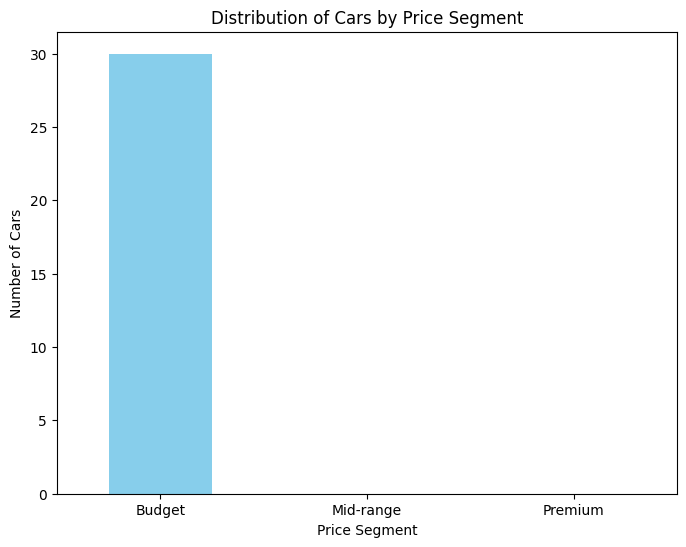

In [26]:
import matplotlib.pyplot as plt

# Bar plot for Price segmentation
plt.figure(figsize=(8, 6))
ev_cars_df['Price_segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.show()


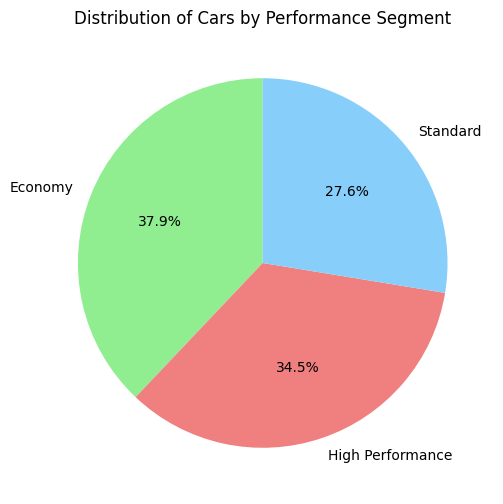

In [27]:
# Pie chart for Performance segmentation
plt.figure(figsize=(8, 6))
ev_cars_df['Performance_segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Cars by Performance Segment')
plt.ylabel('')
plt.show()


<Figure size 800x600 with 0 Axes>

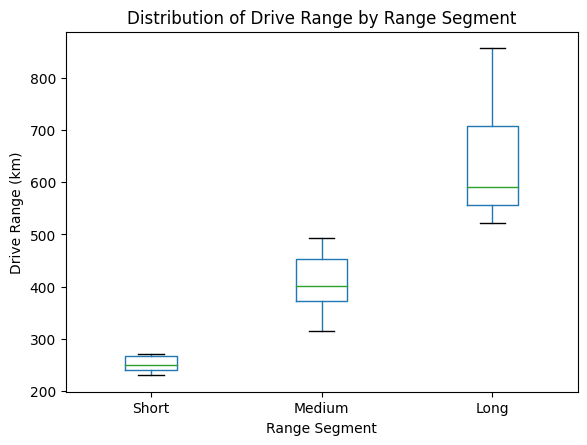

In [28]:
# Box plot for Range segmentation
plt.figure(figsize=(8, 6))
ev_cars_df.boxplot(column='Drive_range', by='Range_segment', grid=False, showfliers=False)
plt.title('Distribution of Drive Range by Range Segment')
plt.suptitle('')
plt.xlabel('Range Segment')
plt.ylabel('Drive Range (km)')
plt.xticks(rotation=0)
plt.show()


<Figure size 800x600 with 0 Axes>

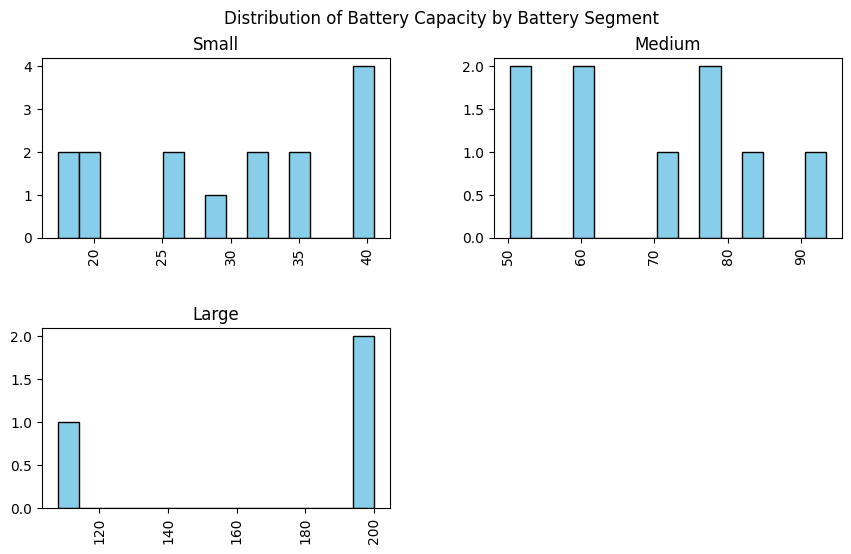

In [29]:
# Histogram for Battery Capacity segmentation
plt.figure(figsize=(8, 6))
ev_cars_df['Batter_cap'].hist(by=ev_cars_df['Battery_segment'], bins=15, color='skyblue', edgecolor='black', figsize=(10,6))
plt.suptitle('Distribution of Battery Capacity by Battery Segment')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Number of Cars')
plt.show()


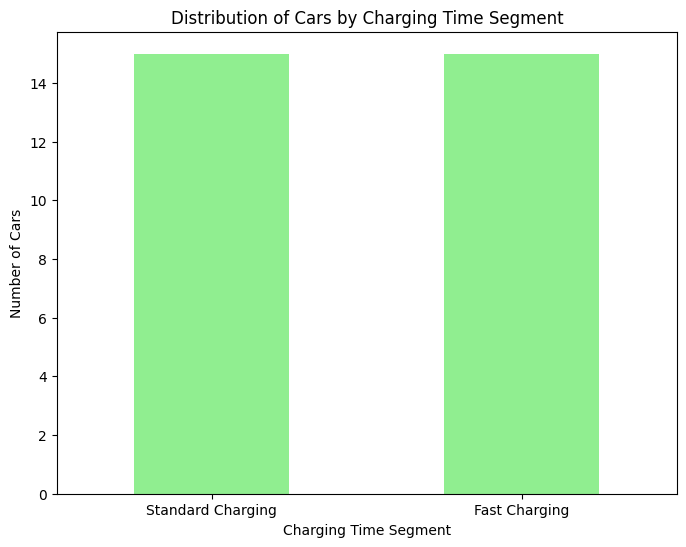

In [30]:
# Bar plot for Charging Time segmentation
plt.figure(figsize=(8, 6))
ev_cars_df['Charging_time_segment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Cars by Charging Time Segment')
plt.xlabel('Charging Time Segment')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.show()